<a href="https://colab.research.google.com/github/khoa2210/Do-an-/blob/main/Th%E1%BB%91ng_k%C3%AA_m%C3%B4_t%E1%BA%A3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

THỐNG KÊ MÔ TẢ


Import các thư viện cần dùng:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import stats
import statistics as st
import numpy as np
import seaborn as sns
from sklearn import linear_model

Import file IncExpData để thống kê:

In [2]:
from google.colab import files
uploaded = files.upload()

Saving Inc_Exp_Data.csv to Inc_Exp_Data.csv


1: Thu thập và làm sạch dữ liệu



In file và đổi tên cột


In [5]:
df = pd.read_csv("Inc_Exp_Data.csv")
df = df.rename(columns={"Mthly_HH_Income": "Thu nhập hàng tháng", "Mthly_HH_Expense": "Chi phí hằng tháng", "No_of_Fly_Members": "Số thành viên", "Emi_or_Rent_Amt": "Tiền thuê hằng tháng", "Annual_HH_Income": "Thu nhập hằng năm", "Highest_Qualified_Member": "Học vị cao nhất", "No_of_Earning_Members": "Số người kiếm tiền"})
df 

,Thu nhập hàng tháng,Chi phí hằng tháng,Số thành viên,Tiền thuê hằng tháng,Thu nhập hằng năm,Học vị cao nhất,Số người kiếm tiền
0,5000,8000,3,2000,64200,Under-Graduate,1
1,6000,7000,2,3000,79920,Illiterate,1
2,10000,4500,2,0,112800,Under-Graduate,1
3,10000,2000,1,0,97200,Illiterate,1
4,12500,12000,2,3000,147000,Graduate,1
5,14000,8000,2,0,196560,Graduate,1
6,15000,16000,3,35000,167400,Post-Graduate,1
7,18000,20000,5,8000,216000,Graduate,1
8,19000,9000,2,0,218880,Under-Graduate,1
9,20000,9000,4,0,220800,Under-Graduate,2


Thông tin của Dataframe

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Thu nhập hàng tháng   50 non-null     int64 
 1   Chi phí hằng tháng    50 non-null     int64 
 2   Số thành viên         50 non-null     int64 
 3   Tiền thuê hằng tháng  50 non-null     int64 
 4   Thu nhập hằng năm     50 non-null     int64 
 5   Học vị cao nhất       50 non-null     object
 6   Số người kiếm tiền    50 non-null     int64 
dtypes: int64(6), object(1)
memory usage: 2.9+ KB


Các cột trong DF

In [8]:
print(df.columns)

Index(['Thu nhập hàng tháng', 'Chi phí hằng tháng', 'Số thành viên',
       'Tiền thuê hằng tháng', 'Thu nhập hằng năm', 'Học vị cao nhất',
       'Số người kiếm tiền'],
      dtype='object')


Khảo sát cột nào có chứa dữ liệu rỗng 



In [9]:
df.isna().any()

Thu nhập hàng tháng     False
Chi phí hằng tháng      False
Số thành viên           False
Tiền thuê hằng tháng    False
Thu nhập hằng năm       False
Học vị cao nhất         False
Số người kiếm tiền      False
dtype: bool

Phân chia mức sống trong dữ liệu để tối ưu trong việc trực quan hóa dữ liệu


In [10]:
df['Số tiền có được hàng tháng'] = df['Thu nhập hàng tháng'] - df['Chi phí hằng tháng'] - df['Tiền thuê hằng tháng']
Types = []
for x in df['Số tiền có được hàng tháng']:
  if x < 0: Types.append("Không đủ chi tiêu")
  elif 0 < x <= 2000: Types.append("Mức dư ít")
  elif 2000 < x <= 5000:Types.append("Mức dư vừa")
  elif 5000 < x <= 10000: Types.append("Mức dư lớn")
  else : Types.append("Mức dư siêu lớn")
df.insert(8,"Mức sống",Types)
df

,Thu nhập hàng tháng,Chi phí hằng tháng,Số thành viên,Tiền thuê hằng tháng,Thu nhập hằng năm,Học vị cao nhất,Số người kiếm tiền,Số tiền có được hàng tháng,Mức sống
0,5000,8000,3,2000,64200,Under-Graduate,1,-5000,Không đủ chi tiêu
1,6000,7000,2,3000,79920,Illiterate,1,-4000,Không đủ chi tiêu
2,10000,4500,2,0,112800,Under-Graduate,1,5500,Mức dư lớn
3,10000,2000,1,0,97200,Illiterate,1,8000,Mức dư lớn
4,12500,12000,2,3000,147000,Graduate,1,-2500,Không đủ chi tiêu
5,14000,8000,2,0,196560,Graduate,1,6000,Mức dư lớn
6,15000,16000,3,35000,167400,Post-Graduate,1,-36000,Không đủ chi tiêu
7,18000,20000,5,8000,216000,Graduate,1,-10000,Không đủ chi tiêu
8,19000,9000,2,0,218880,Under-Graduate,1,10000,Mức dư lớn
9,20000,9000,4,0,220800,Under-Graduate,2,11000,Mức dư siêu lớn


2: Biện pháp phân tích xu hướng tập trung của trung tâm dữ liệu


Giá trị trung bình của tập dữ liệu (Mean): 

In [11]:
pd.DataFrame(df.mean().T)

,0
Thu nhập hàng tháng,41558.00
Chi phí hằng tháng,18818.00
Số thành viên,4.06
Tiền thuê hằng tháng,3060.00
Thu nhập hằng năm,490019.04
Số người kiếm tiền,1.46
Số tiền có được hàng tháng,19680.00


Harmonic mean của dữ liệu cột trong Data



Xóa dữ liệu học vị và mức sống để tối ưu tính toán 


In [12]:
df1 = df.drop(df.columns[[5,8]], axis=1)
df1

,Thu nhập hàng tháng,Chi phí hằng tháng,Số thành viên,Tiền thuê hằng tháng,Thu nhập hằng năm,Số người kiếm tiền,Số tiền có được hàng tháng
0,5000,8000,3,2000,64200,1,-5000
1,6000,7000,2,3000,79920,1,-4000
2,10000,4500,2,0,112800,1,5500
3,10000,2000,1,0,97200,1,8000
4,12500,12000,2,3000,147000,1,-2500
5,14000,8000,2,0,196560,1,6000
6,15000,16000,3,35000,167400,1,-36000
7,18000,20000,5,8000,216000,1,-10000
8,19000,9000,2,0,218880,1,10000
9,20000,9000,4,0,220800,2,11000


In [13]:
print("Giá trị Harmonic mean của cột tập dữ liệu")
pd.DataFrame(stats.hmean(df1.iloc[:,0:6],axis=0).T)

Giá trị Harmonic mean của cột tập dữ liệu


,0
0,25530.137609
1,12103.840091
2,3.400810
3,0.000000
4,301734.486730
5,1.232033


Giá trị trung bình hình học của cột tập dữ liệu 


In [15]:
pd.DataFrame(stats.gmean(df1.iloc[:,0:6],axis=0).T)

/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:330: RuntimeWarning: divide by zero encountered in log
  log_a = np.log(np.array(a, dtype=dtype))


,0
0,33590.377540
1,15391.899582
2,3.749694
3,0.000000
4,394319.828944
5,1.325739


Giá trị trung vị tập dữ liệu


In [16]:
pd.DataFrame(df.median().T)

,0
Thu nhập hàng tháng,35000.0
Chi phí hằng tháng,15500.0
Số thành viên,4.0
Tiền thuê hằng tháng,0.0
Thu nhập hằng năm,447420.0
Số người kiếm tiền,1.0
Số tiền có được hàng tháng,17000.0


Giá trị yếu vị tập dữ liệu


In [17]:
pd.DataFrame(df.mode().T)

,0
Thu nhập hàng tháng,45000
Chi phí hằng tháng,25000
Số thành viên,4
Tiền thuê hằng tháng,0
Thu nhập hằng năm,590400
Học vị cao nhất,Graduate
Số người kiếm tiền,1
Số tiền có được hàng tháng,30000
Mức sống,Mức dư siêu lớn


3: Biện pháp phân tích sự thay đổi, phân tán của tập dữ liệu 

Phạm vi (Độ biến thiên) của dữ liệu


In [18]:
min = df.min (numeric_only= True)
max = df.max (numeric_only= True) 
f = pd.DataFrame(max - min)
f

,0
Thu nhập hàng tháng,95000
Chi phí hằng tháng,48000
Số thành viên,6
Tiền thuê hằng tháng,35000
Thu nhập hằng năm,1339800
Số người kiếm tiền,3
Số tiền có được hàng tháng,109000


Phương sai của dữ liệu 

In [19]:
a = pd.DataFrame(df.var(skipna= True).T)
a

,0
Thu nhập hàng tháng,6.811009e+08
Chi phí hằng tháng,1.461733e+08
Số thành viên,2.302449e+00
Tiền thuê hằng tháng,3.895551e+07
Thu nhập hằng năm,1.024869e+11
Số người kiếm tiền,5.391837e-01
Số tiền có được hàng tháng,5.056559e+08


Độ lệch chuẩn dữ liệu 

In [20]:
b = pd.DataFrame(df.std(skipna= True).T)
b

,0
Thu nhập hàng tháng,26097.908979
Chi phí hằng tháng,12090.216824
Số thành viên,1.517382
Tiền thuê hằng tháng,6241.434948
Thu nhập hằng năm,320135.792123
Số người kiếm tiền,0.734291
Số tiền có được hàng tháng,22486.794311


Hệ số biến động của dữ liệu 


In [21]:
cv = lambda df: np.std(df, ddof=1) / np.mean(df) * 100
pd.DataFrame(cv(df))

,0
Thu nhập hàng tháng,62.798761
Chi phí hằng tháng,64.248150
Số thành viên,37.373948
Tiền thuê hằng tháng,203.968462
Thu nhập hằng năm,65.331297
Số người kiếm tiền,50.293923
Số tiền có được hàng tháng,114.262166


Độ lệch mẫu đo độ không đối xứng của dữ liệu 

In [22]:
pd.DataFrame(stats.skew(df1,bias=False))

,0
0,0.924615
1,1.199461
2,0.113674
3,3.403680
4,1.192949
5,1.593301
6,0.413996


Phần trăm (Phân vị mẫu) của dữ liệu 

In [23]:
ql = pd.DataFrame(df.quantile([0.25,0.50,0.75]).T)
ql

,0.25,0.50,0.75
Thu nhập hàng tháng,23550.0,35000.0,50375.0
Chi phí hằng tháng,10000.0,15500.0,25000.0
Số thành viên,3.0,4.0,5.0
Tiền thuê hằng tháng,0.0,0.0,3500.0
Thu nhập hằng năm,258750.0,447420.0,594720.0
Số người kiếm tiền,1.0,1.0,2.0
Số tiền có được hàng tháng,5125.0,17000.0,30875.0


Thước đo về mối tương quan giữa các cặp dữ liệu
Bảng thống kê mức độ phụ thuộc của từng tập dữ liệu trong data

In [24]:
corr = df.corr()
corr

,Thu nhập hàng tháng,Chi phí hằng tháng,Số thành viên,Tiền thuê hằng tháng,Thu nhập hằng năm,Số người kiếm tiền,Số tiền có được hàng tháng
Thu nhập hàng tháng,1.000000,0.649215,0.448317,0.036976,0.970315,0.347883,0.801269
Chi phí hằng tháng,0.649215,1.000000,0.639702,0.405280,0.591222,0.311915,0.103323
Số thành viên,0.448317,0.639702,1.000000,0.085808,0.430868,0.597482,0.152554
Tiền thuê hằng tháng,0.036976,0.405280,0.085808,1.000000,0.002716,-0.097431,-0.452548
Thu nhập hằng năm,0.970315,0.591222,0.430868,0.002716,1.000000,0.296679,0.807508
Số người kiếm tiền,0.347883,0.311915,0.597482,-0.097431,0.296679,1.000000,0.263089
Số tiền có được hàng tháng,0.801269,0.103323,0.152554,-0.452548,0.807508,0.263089,1.000000


Biểu đồ thống kê mức độ phụ thuộc của từng tập dữ liệu trong data

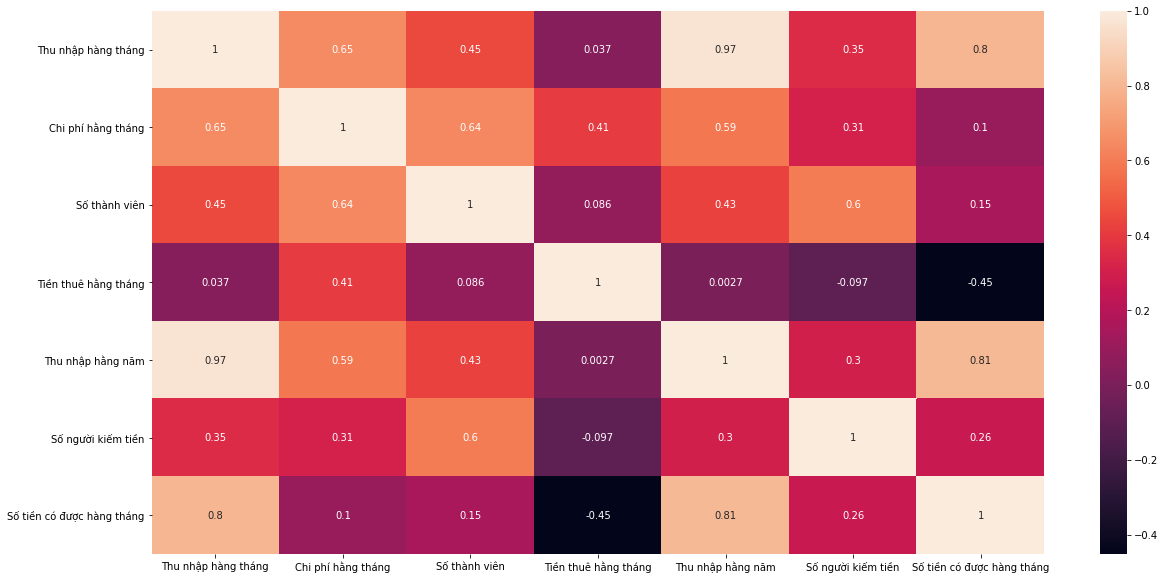

In [27]:
plt.subplots(figsize=(20,10))
sns.heatmap(corr, annot=True)

Thiết lập mô hình hồi quy tuyến tính 

In [ ]:
regr = linear_model.LinearRegression()
y = df['Thu nhập hàng tháng']
x = df[['Chi phí hằng tháng','Số thành viên']]
regr.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
print('Hệ số hồi quy')
regr.coef_

Hệ số hồi quy


array([  1.32423097, 961.10864254])

In [ ]:
print('Hệ số chặn y ')
regr.intercept_

Hệ số chặn y 


12736.520499042934

4: Tóm tắt thống kê mô tả 

Bảng tóm tắt thống kê mô tả

In [ ]:
df.describe()

,Thu nhập hàng tháng,Chi phí hằng tháng,Số thành viên,Tiền thuê hằng tháng,Thu nhập hằng năm,Số người kiếm tiền,Số tiền có được hàng tháng
count,50.000000,50.000000,50.000000,50.000000,5.000000e+01,50.000000,50.000000
mean,41558.000000,18818.000000,4.060000,3060.000000,4.900190e+05,1.460000,19680.000000
std,26097.908979,12090.216824,1.517382,6241.434948,3.201358e+05,0.734291,22486.794311
min,5000.000000,2000.000000,1.000000,0.000000,6.420000e+04,1.000000,-36000.000000
25%,23550.000000,10000.000000,3.000000,0.000000,2.587500e+05,1.000000,5125.000000
50%,35000.000000,15500.000000,4.000000,0.000000,4.474200e+05,1.000000,17000.000000
75%,50375.000000,25000.000000,5.000000,3500.000000,5.947200e+05,2.000000,30875.000000
max,100000.000000,50000.000000,7.000000,35000.000000,1.404000e+06,4.000000,73000.000000


5: Trực quan hóa dữ liệu 

Biểu đồ cột thể hiện số tiền có được hàng tháng của tập dữ liệu 

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


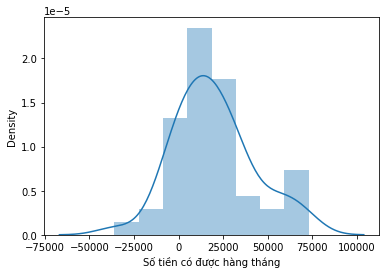

In [ ]:
sns.distplot(df["Số tiền có được hàng tháng"])

Biểu đồ hộp  trình bày trực quan về thống kê mô tả của tập dữ liệu 

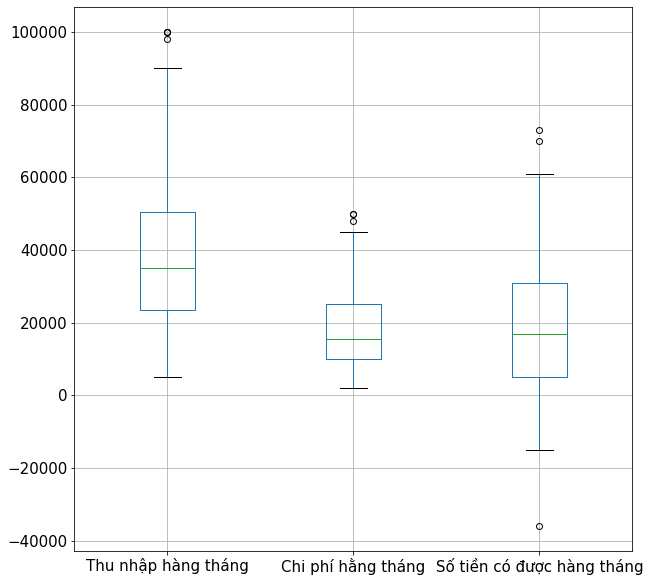

In [29]:
boxplot = df.boxplot(column=['Thu nhập hàng tháng', 'Chi phí hằng tháng', 'Số tiền có được hàng tháng'],fontsize= 15 ,figsize=(10,10))

Tính tỉ lệ mức sống trong tập dữ liệu






In [32]:
z = df.groupby('Mức sống')['Mức sống'].count()
z = pd.DataFrame(z)
z.columns = ['Số lượng']
z

,Số lượng
Mức sống,
Không đủ chi tiêu,8
Mức dư lớn,5
Mức dư siêu lớn,33
Mức dư vừa,1
Mức dư ít,3


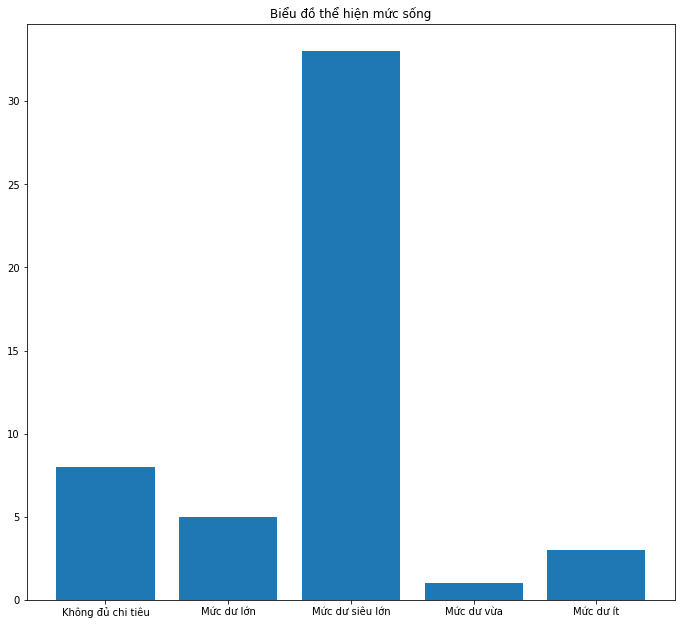

In [34]:
fig = plt.figure()
ax = fig.add_axes([0,0,1.5,2])
ax.set_title('Biểu đồ thể hiện mức sống')
td = ['Không đủ chi tiêu',"Mức dư lớn",'Mức dư siêu lớn','Mức dư vừa','Mức dư ít']
sl = [8,5,33,1,3]
ax.bar(td,sl)
plt.show()

In [35]:
z.columns = ['Percent']
type_live = z/sum(z['Percent'])*100
type_live

,Percent
Mức sống,
Không đủ chi tiêu,16.0
Mức dư lớn,10.0
Mức dư siêu lớn,66.0
Mức dư vừa,2.0
Mức dư ít,6.0


Biểu đồ tròn thể hiện tỉ lệ mức sống trong tập dữ liệu 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  


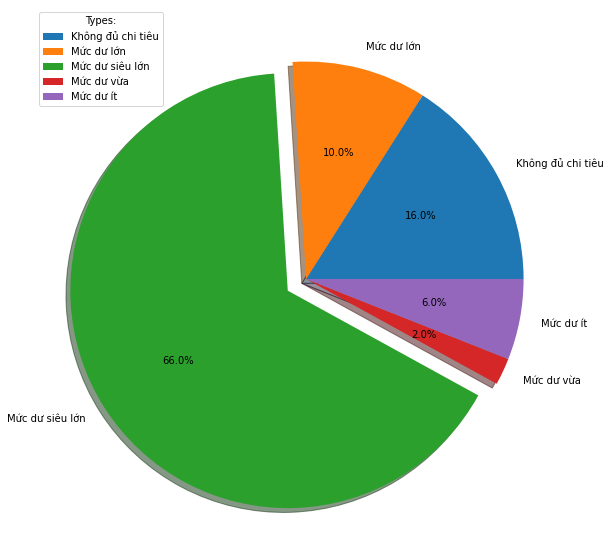

In [36]:
g = type_live.values.tolist()
mylabelss = ["Không đủ chi tiêu", "Mức dư lớn", "Mức dư siêu lớn", "Mức dư vừa","Mức dư ít"]
myexplodes = [0, 0, 0.1, 0, 0]
mycolorss = ["r", "g", "m", "y", "c"]
plt.figure(figsize=(10,10))
plt.pie(g, labels = mylabelss, startangle = 0, explode = myexplodes,shadow = True, autopct='%1.1f%%')
plt.legend(title = "Types:", fontsize = 10, loc =2)
plt.show() 

Biểu đồ thể hiện sự phân tán giữa thu nhập và chi phí 

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


Text(0.5, 1.0, 'Mối quan hệ phân tán giữa thu nhập và chi phí hằng tháng của mỗi học vị')

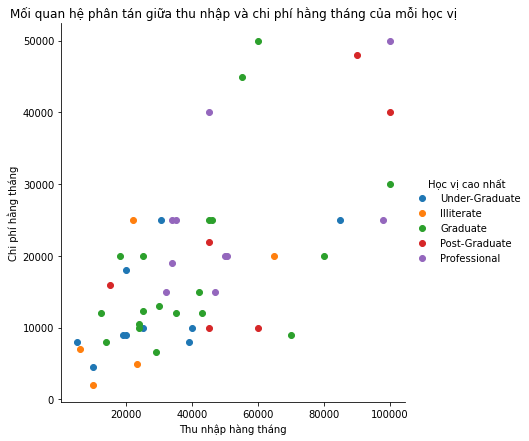

In [37]:
sns.FacetGrid(df, hue="Học vị cao nhất", size=6) \
   .map(plt.scatter, "Thu nhập hàng tháng", "Chi phí hằng tháng") \
   .add_legend()
plt.title("Mối quan hệ phân tán giữa thu nhập và chi phí hằng tháng của mỗi học vị")

Biểu đồ đường thể hiện thu nhập và chi phí hàng tháng

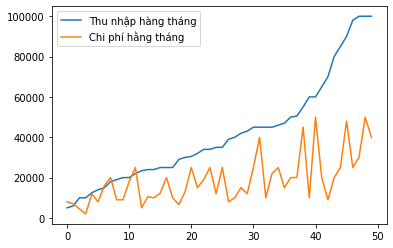

In [ ]:
df[["Thu nhập hàng tháng", "Chi phí hằng tháng"]].plot()